In [ ]:
import pandas as pd
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
train = pd.read_csv('a/content/drive/MyDrive/Colab Notebooks/train.csv')
%pwd
#https://neptune.ai/blog/google-colab-dealing-with-files
train.head()

Mounted at /content/drive


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(train.shape)

(891, 12)


<Axes: >

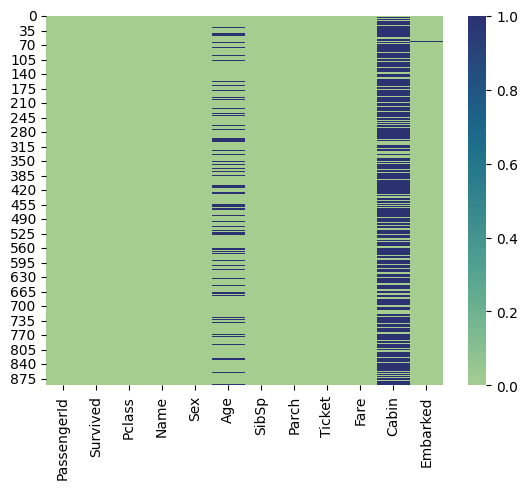

In [ ]:
sbn.heatmap(train.isnull(), cmap = 'crest')
# additional arguments ( xticklabels = False, yticklabels = False, cbar = False)

<Axes: xlabel='Survived', ylabel='count'>

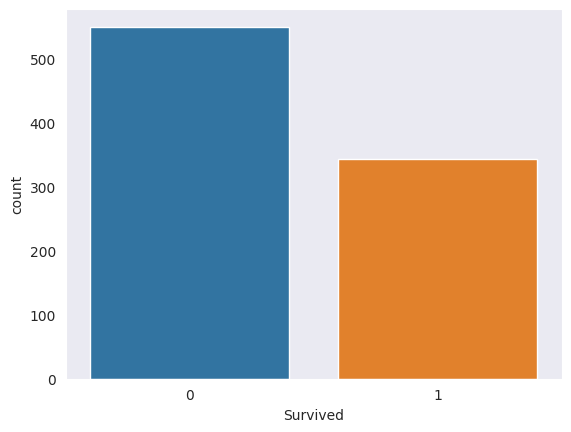

In [ ]:
sbn.set_style('dark')
sbn.countplot(x = 'Survived', data = train)

<Axes: xlabel='Survived', ylabel='count'>

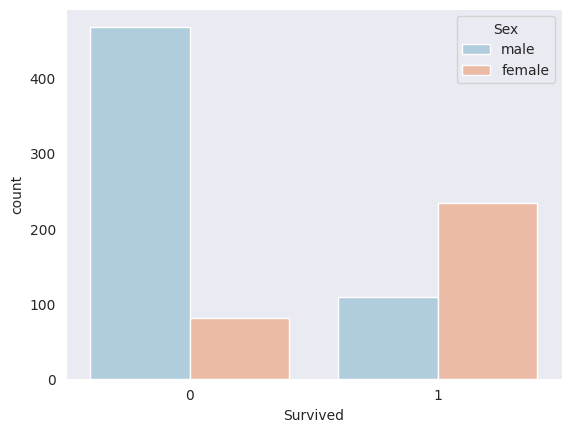

In [ ]:
sbn.countplot(x = 'Survived', hue = 'Sex', data = train, palette = 'RdBu_r')

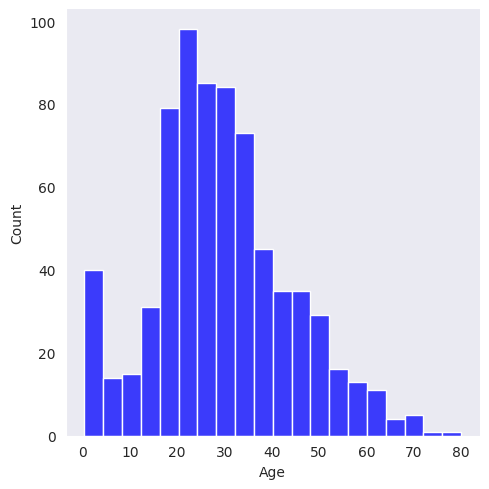

In [ ]:
sbn.displot(train['Age'].dropna(),kind = 'hist', color = 'blue', bins = 20)

<Axes: >

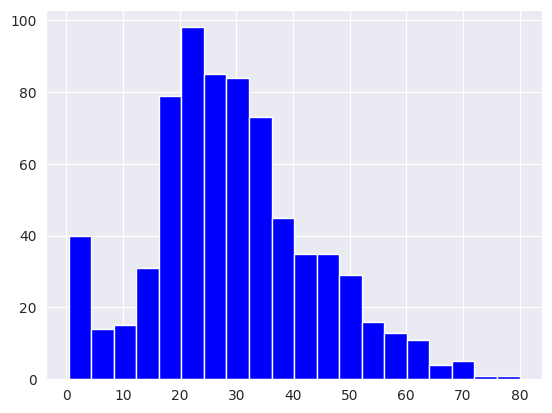

In [ ]:
train['Age'].hist(bins = 20, color = 'blue', alpha = 1)

<Axes: xlabel='Pclass', ylabel='Age'>

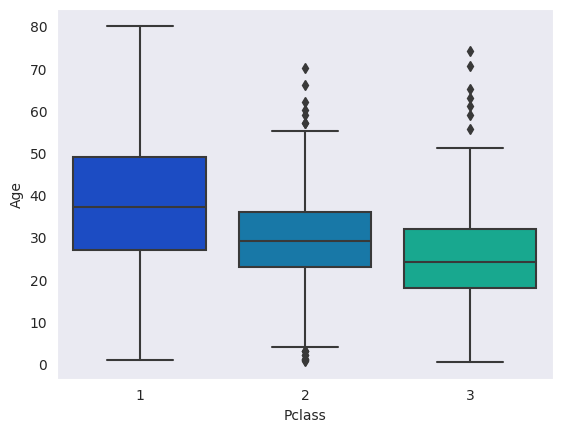

In [ ]:
sbn.boxplot(data = train, x = 'Pclass', y = 'Age', palette = 'winter')

In [ ]:
#learn how to edit columns of a dataframe http://pytolearn.csd.auth.gr/b4-pandas/40/moddfcols.html
row, col = train.shape
for r in range(row):
  if train['Pclass'][r] == 1:
    train['Age'][r] = 38
  elif train['Pclass'][r] == 2:
    train['Age'][r] = 30
  else:
    train['Age'][r] = 25

train.head()

<ipython-input-9-d455356cd5c1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][r] = 25
<ipython-input-9-d455356cd5c1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][r] = 38
<ipython-input-9-d455356cd5c1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][r] = 30


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,25.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,25.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,38.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,25.0,0,0,373450,8.0500,NaN,S


<Axes: >

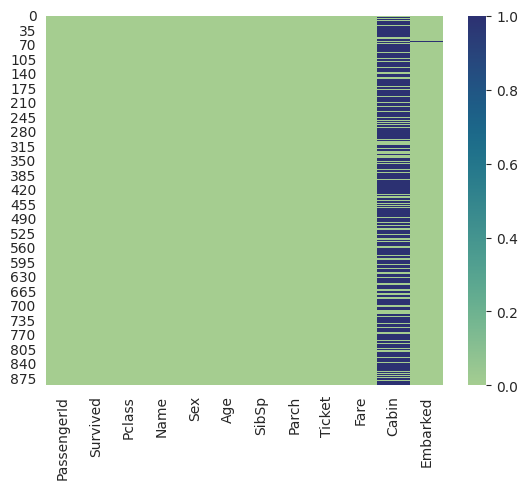

In [ ]:
sbn.heatmap(train.isnull(), cmap = 'crest')

In [ ]:
train.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis = 1, inplace = True)

In [ ]:
train.head(10)
train.shape

(891, 8)

In [ ]:
class Tree:
  def init(self,values,children):
    self.values = []
    self.children = []

In [ ]:
import math

attributes = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
indices = range(891)

def get_values(dataset, indices, attr):
  values = {}
  for i in indices:
    values = {k: v for k, v in (dataset[attr],[i])}
  return values


def H(p, q):
  p = p/(p+q)
  return -p*math.log2(p) - (1-p)*math.log2(1-p)


def DecisionTree(dataset, attributes, indices):
  final_attribute = None
  final_values = None
  min_entropy = 1

  for attr in attributes:
    values = get_values(dataset, indices, attr)
    entropy = 0
    for value in values:
      p = q = 0
      for i in indices:
        if dataset[attr][i] == value:
          if dataset['Survived'][i] == 1:
            p += 1
          else:
            q += 1
      entropy += ((p+q)/len(indices) )* H(p, q)
    if entropy < min_entropy:
      final_attribute = attr
      final_values = values

  T = Tree()  
  for value in final_values:
    indexes = []
    for i in indices:
      if dataset[final_attribute][i] == value:
        indexes.append(i)
    attributes.remove(final_attribute)
    child = DecisionTree(dataset, attributes, indexes)
    attributes.append(final_attribute)
    T.children.append(child)
  T.values = final_values

  return T 
  



In [ ]:
embarked = pd.get_dummies(train['Embarked'])
sex = pd.get_dummies(train['Sex'])
train.drop(['Embarked', 'Sex'], axis = 1, inplace = True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,25.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,25.0,0,0,7.9250
3,1,1,38.0,1,0,53.1000
4,0,3,25.0,0,0,8.0500


In [ ]:
train = pd.concat([train, sex, embarked], axis = 1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,25.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,25.0,0,0,7.9250,1,0,0,0,1
3,1,1,38.0,1,0,53.1000,1,0,0,0,1
4,0,3,25.0,0,0,8.0500,0,1,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(train.drop('Survived', axis = 1), train['Survived'], test_size = 0.3, random_state = 101)

In [ ]:
DecisionTree(X_train,attributes,indices)

ValueError: ignored

In [ ]:
predictions = DecisionTree(X_test,attributes,X_test.shape[0])
from sklearn.metrics import confusion_matrix
accuracy = confusion_matrix(Y_test, predictions)
print(accuracy)

score = (accuracy[0][0] + accuracy[1][1])/(accuracy[0][0] + accuracy[1][1] + accuracy[1][0] + accuracy[0][1])

print(score)